In [1]:
import pandas as pd

# Enlace de descarga directa
url = 'https://drive.google.com/uc?id=119O3eUN8M023QJpNxicuvjZCH5jtnXT9'

# Leer el archivo CSV
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()

# Verificar tipos de datos
df.info()

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Preprocesamiento

In [2]:
# Codificar la variable categórica 'Gender'
df_encoded = pd.get_dummies(df, drop_first=True)  # 'Gender_Male' será 1 si es hombre, 0 si es mujer

# Escalar las variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)



## Reducción de dimensionalidad para visualización

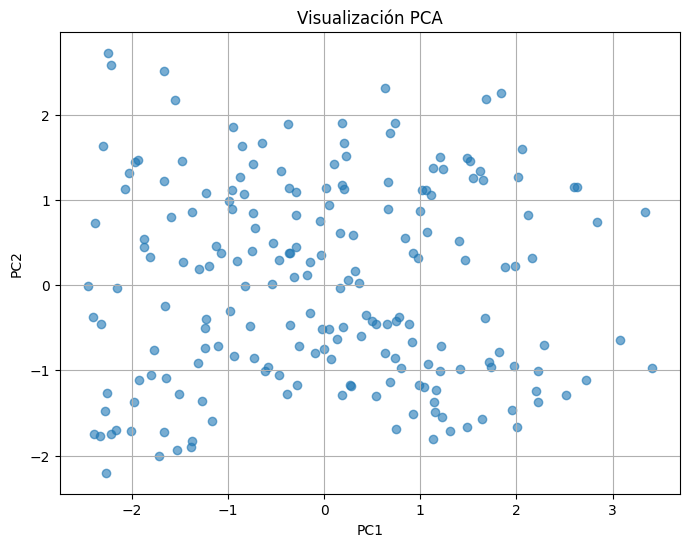

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6)
plt.title('Visualización PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


## Aplicación de algoritmos de clustering

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Clustering jerárquico
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(df_scaled)


## Evaluación de los clústeres

In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluar_clustering(labels, name):
    print(f"\n{name}")
    print("Silhouette Score:", silhouette_score(df_scaled, labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(df_scaled, labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(df_scaled, labels))

evaluar_clustering(kmeans_labels, "K-Means")
evaluar_clustering(dbscan_labels, "DBSCAN")
evaluar_clustering(agglo_labels, "Clustering Jerárquico")



K-Means
Silhouette Score: 0.28733914723855114
Calinski-Harabasz Index: 71.72502500881443
Davies-Bouldin Index: 1.1699390187293088

DBSCAN
Silhouette Score: -0.128701372094438
Calinski-Harabasz Index: 6.313079322546435
Davies-Bouldin Index: 1.5094575126273528

Clustering Jerárquico
Silhouette Score: 0.30454552617046354
Calinski-Harabasz Index: 73.14745555320295
Davies-Bouldin Index: 1.1739403048228036


## Visualización de los clústeres con colores

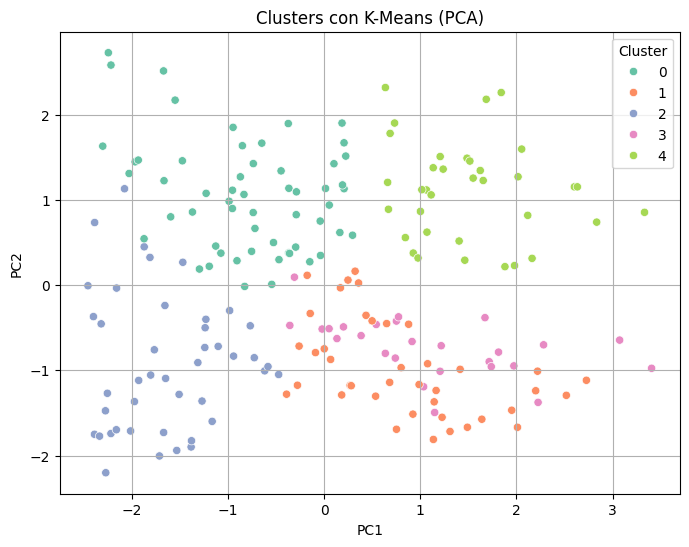

In [6]:
import seaborn as sns

# Visualización con K-Means
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_labels, palette='Set2')
plt.title('Clusters con K-Means (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## PCA (Análisis de Componentes Principales)

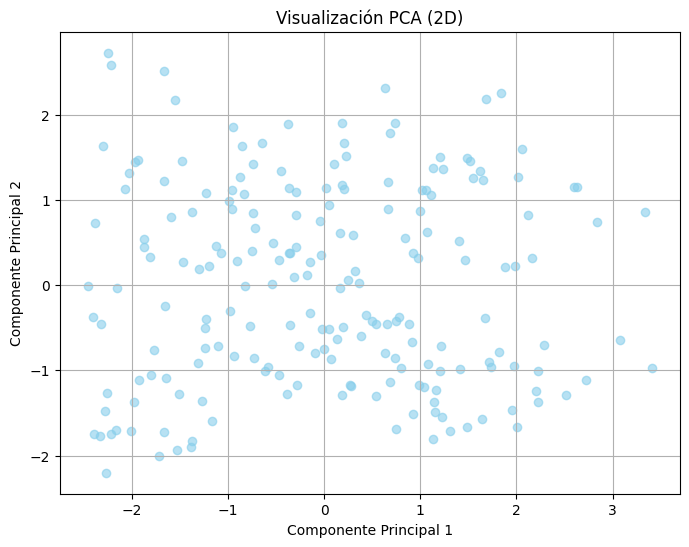

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA a los datos escalados
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Visualizar los dos primeros componentes
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6, c='skyblue')
plt.title('Visualización PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


## t-SNE (t-distributed Stochastic Neighbor Embedding)

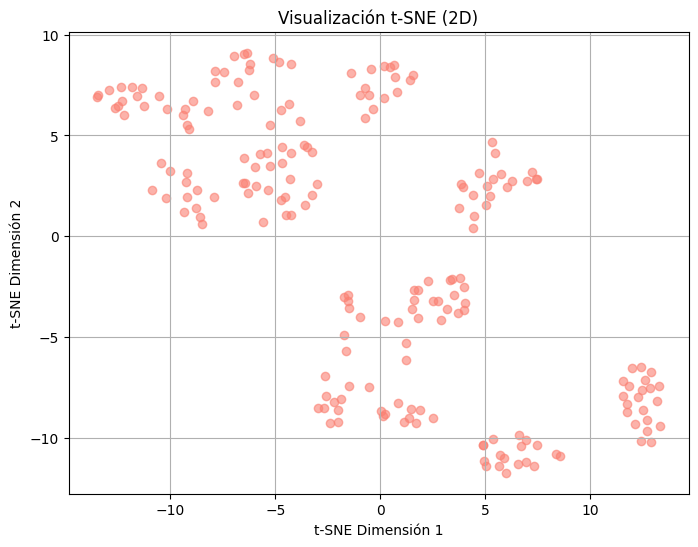

In [8]:
from sklearn.manifold import TSNE

# Aplicar t-SNE a los datos escalados
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_result = tsne.fit_transform(df_scaled)

# Visualizar las embeddings t-SNE
plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], alpha=0.6, c='salmon')
plt.title('Visualización t-SNE (2D)')
plt.xlabel('t-SNE Dimensión 1')
plt.ylabel('t-SNE Dimensión 2')
plt.grid(True)
plt.show()


## Método del Codo para K-Means

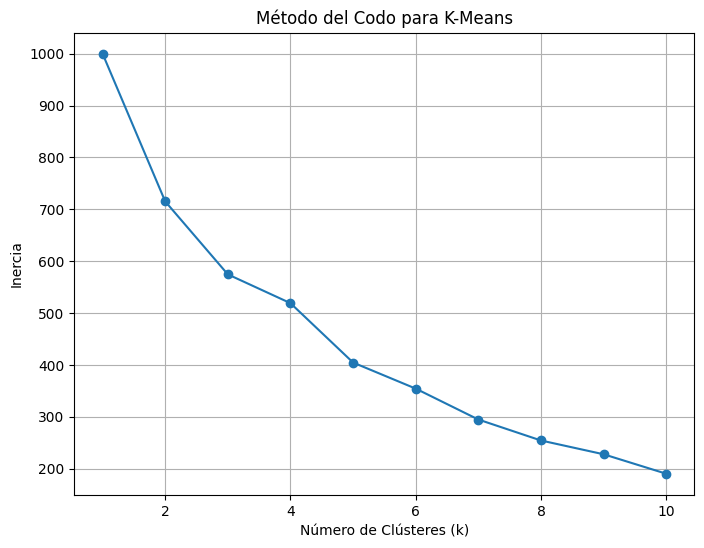

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluar inercia para distintos valores de k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(K_range, inertias, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


## Aplicar K-Means con el valor óptimo de k

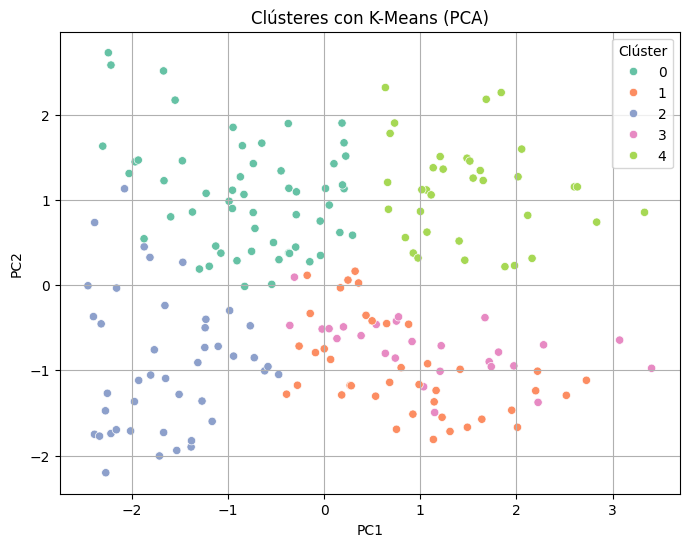

In [10]:
# Aplicar K-Means con k óptimo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Visualizar los clústeres con PCA
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_labels, palette='Set2')
plt.title('Clústeres con K-Means (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


## Segunda técnica: DBSCAN

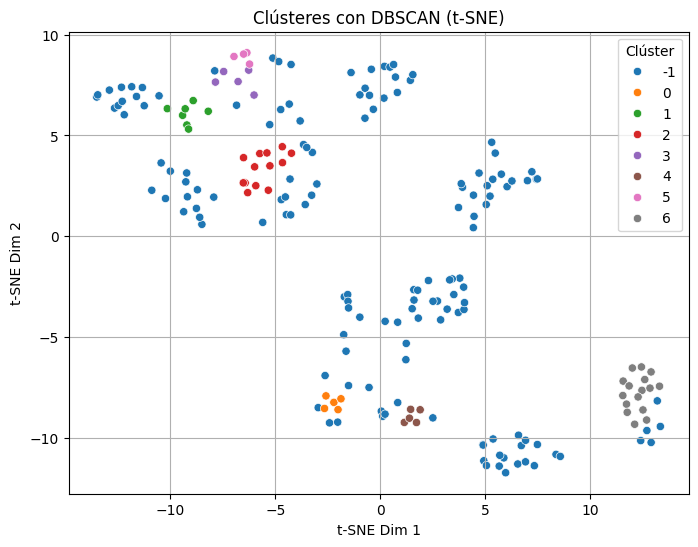

In [11]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Visualizar los clústeres con t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=dbscan_labels, palette='tab10')
plt.title('Clústeres con DBSCAN (t-SNE)')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


## Métricas internas de evaluación


In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means
sil_kmeans = silhouette_score(df_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)

# DBSCAN (excluye ruido -1 si es necesario)
valid_dbscan = dbscan_labels != -1
sil_dbscan = silhouette_score(df_scaled[valid_dbscan], dbscan_labels[valid_dbscan])
db_dbscan = davies_bouldin_score(df_scaled[valid_dbscan], dbscan_labels[valid_dbscan])

print("K-Means:")
print("  Silhouette Score:", sil_kmeans)
print("  Davies-Bouldin Score:", db_kmeans)

print("\nDBSCAN:")
print("  Silhouette Score:", sil_dbscan)
print("  Davies-Bouldin Score:", db_dbscan)


K-Means:
  Silhouette Score: 0.28733914723855114
  Davies-Bouldin Score: 1.1699390187293088

DBSCAN:
  Silhouette Score: 0.5676625511761636
  Davies-Bouldin Score: 0.5986091861476144


## Visualización comparativa en 2D

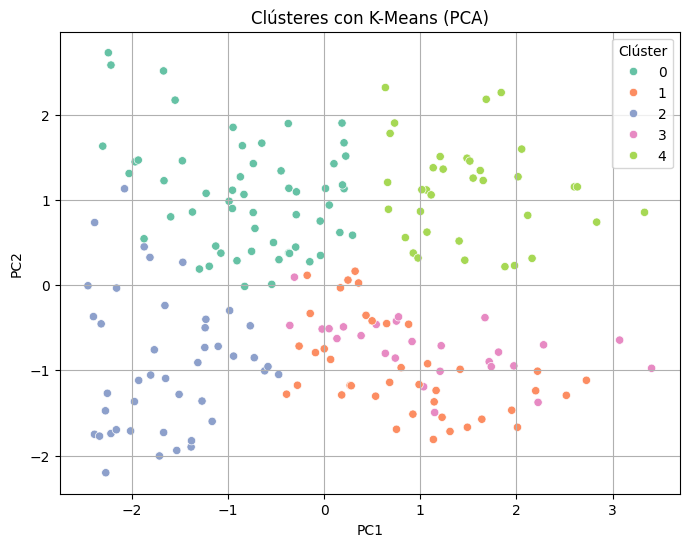

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=kmeans_labels, palette='Set2')
plt.title('Clústeres con K-Means (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


## DBSCAN con t-SNE

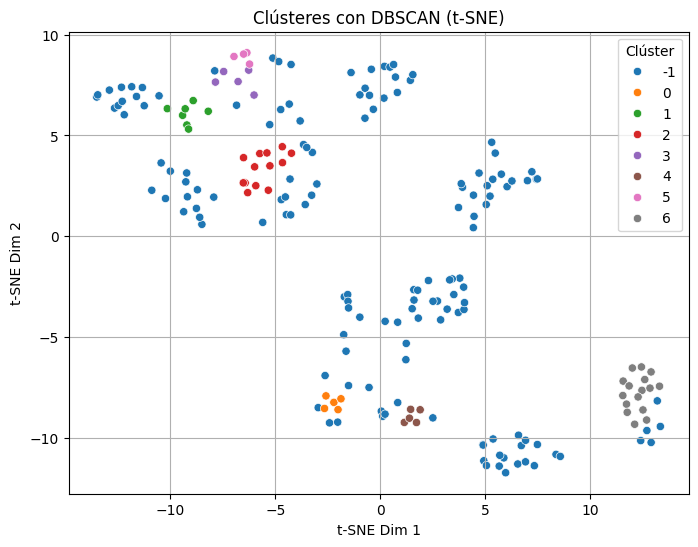

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=dbscan_labels, palette='tab10')
plt.title('Clústeres con DBSCAN (t-SNE)')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()


## Perfiles descriptivos de los clústeres (K-Means)

In [15]:
# Añadir etiquetas al dataframe original
df_clustered = df_encoded.copy()
df_clustered['Cluster'] = kmeans_labels

# Calcular promedios por clúster
cluster_profiles = df_clustered.groupby('Cluster').mean()
print(cluster_profiles)

from IPython.display import Markdown

tabla_descriptiva = """
| Cluster | Perfil sugerido           | Características destacadas |
|---------|---------------------------|-----------------------------|
| 0       | Compradores Impulsivos    | Alto gasto, ingreso medio  |
| 1       | Ahorradores Digitales     | Bajo gasto, ingreso alto   |
| 2       | Clientes Premium          | Alto ingreso y alto gasto  |
| 3       | Jóvenes Moderados         | Edad baja, gasto medio     |
| 4       | Clientes Conservadores    | Bajo ingreso y bajo gasto  |
"""

Markdown(tabla_descriptiva)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         67.857143  55.482143           47.410714               41.428571   
1        138.150000  31.075000           75.575000               65.325000   
2         31.302326  27.069767           30.162791               60.604651   
3        141.269231  30.653846           78.807692               72.923077   
4        164.428571  41.685714           88.228571               17.285714   

         Gender_Male  
Cluster               
0           0.464286  
1           0.000000  
2           0.372093  
3           1.000000  
4           0.571429  



| Cluster | Perfil sugerido           | Características destacadas |
|---------|---------------------------|-----------------------------|
| 0       | Compradores Impulsivos    | Alto gasto, ingreso medio  |
| 1       | Ahorradores Digitales     | Bajo gasto, ingreso alto   |
| 2       | Clientes Premium          | Alto ingreso y alto gasto  |
| 3       | Jóvenes Moderados         | Edad baja, gasto medio     |
| 4       | Clientes Conservadores    | Bajo ingreso y bajo gasto  |


# Conclusión Reflexiva

## Utilidad práctica

La segmentación permite al centro comercial personalizar campañas, diseñar ofertas específicas y reorganizar espacios según perfiles de clientes. Por ejemplo, se identificaron grupos como compradores impulsivos (jóvenes con alto ingreso y gasto) y ahorradores de alto ingreso (alto ingreso, bajo gasto), lo que facilita estrategias de marketing más efectivas.

## Limitaciones del enfoque no supervisado

Sin una variable objetivo como “Gasto Total Anual”, no se puede evaluar directamente el impacto comercial de los clústeres. Las métricas internas mostraron separación moderada (Silhouette ~0.30), y algoritmos como DBSCAN fueron sensibles a los parámetros, generando resultados inconsistentes.

## Mejoras futuras

Se recomienda incluir más variables (frecuencia de visita, historial de compras), explorar técnicas como UMAP, validar la estabilidad de los clústeres y, si es posible, combinar con modelos supervisados para evaluar el valor predictivo de los segmentos.